#What type of content is view by people, distributed by the countries?(category)

In [2]:
import pandas as pd
import os
import re
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import random
import pickle
import json

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
def read_csv_file(path):
    try:
        df = pd.read_csv(path, encoding='utf-8')
    except:
        df = pd.read_csv(path, encoding='latin1')
    return df

path_to_csv_Video_df =      'C:\\Users\\souro\\Desktop\\VS Code\\Youtube Trending\\data\\Video_df.csv'
Video_df = read_csv_file(path_to_csv_Video_df)
Video_df=Video_df.drop('thumbnail_link', axis=1)


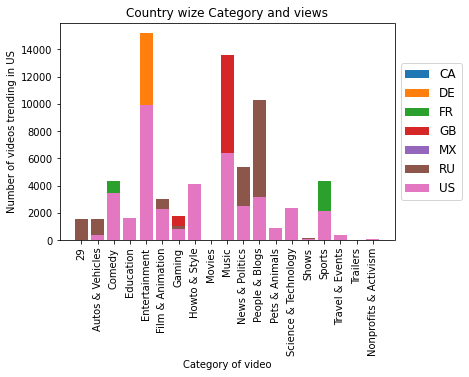

In [8]:
all_countries=['CA', 'DE', 'FR', 'GB', 'MX', 'RU', 'US']
all_disc=dict()
for country in all_countries:
    new_datagram_based = Video_df[Video_df['country']==country]
    #new_datagram_based=new_datagram_based.drop_duplicates(subset=['video_id'], keep='first')
    # new_datagram_based = df[df['country']=='US']
    # new_datagram_based=new_datagram_based.drop_duplicates(subset=['video_id'], keep='first')
    new_datagram_based_CA= pd.DataFrame({"Total_videotrend" : new_datagram_based.groupby(by='category_id')['category_id'].count()})
    x=list(new_datagram_based_CA['Total_videotrend'].keys())
    y=list(new_datagram_based_CA['Total_videotrend'].values[:])
    all_disc[country]=new_datagram_based_CA

    _=plt.bar(x, y)
    _=plt.xticks(rotation=90, horizontalalignment="center")
    _=plt.title('Country wize Category and views')
    _=plt.xlabel("Category of video")
    _=plt.ylabel("Number of videos trending in "+country)
    _=plt.plot() 
#plt.show()
_=plt.legend(labels=all_countries, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show(block=False )

In [9]:
for country in all_countries:
    x=all_disc[country].keys()
    y=all_disc[country].val

dict_keys(['CA', 'DE', 'FR', 'GB', 'MX', 'RU', 'US'])

In [ ]:
x= 3#number of bins
dataset = [1, 2, 2, 3, 4, 5]

In [49]:
def automatic_histogram(dataset, x):
    sorted_dataset=dataset
    sorted_dataset.sort()
    histogram=dict()

    initial_point=sorted_dataset[0]
    final_point=sorted_dataset[-1]
    
    ideal_lenght=round((final_point-initial_point)/x)
    #print(ideal_lenght)
    new_initial_point=sorted_dataset[0]
    new_final_point=sorted_dataset[0]
    values_dict=dict()

    for i in range(initial_point,final_point+1):
        values_dict[i]=0
    
    for i in sorted_dataset:
        values_dict[i]=values_dict[i]+1
    
    
    while new_final_point<=final_point:
        
        value=0
        
        if new_final_point==final_point:
            char_bin=str(new_final_point)
            value=values_dict[new_final_point]

        elif new_final_point<final_point:
            new_final_in_bin=min(new_final_point+ideal_lenght,final_point)
            char_bin=str(new_final_point)+'-'+str(new_final_in_bin)
            for i in range(new_final_point,new_final_in_bin+1):
                value=value+values_dict[i]
            
        
        histogram[char_bin]=value
        
        
        new_final_point=new_final_point+ideal_lenght+1
    return histogram